In [1]:
# Gọi các thư viện cần thiết cho bài toán
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

Bảng dữ liệu bao gồm các trường như sau:

1. Id: chỉ số đếm của từng mẫu
2. SepalLengthCm: độ dài của đài hoa
3. SepalWidthCm: độ rộng của đài hoa
4. PetalLengthCm: độ dài cách hoa
5. PetalWidthCm: độ rộng của cánh hoa
6. Species: phân loại của từng loài hoa lan

# Target
Phân loại cho từng loài hoa lan (setosa, virginica, versicolor) dựa theo các đặc trưng(dữ liệu) cho trước.

In [2]:
data_path = "iris.csv"
data = pd.read_csv(data_path)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Tìm hiểu các giá trị của từng trường
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [5]:
# Tìm hiểu các giá trị của từng trường là số
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
# Xem dữ liệu trống
null_info = pd.DataFrame({'Null count': data.isnull().sum(), 'Null ratio': data.isnull().sum() / data.shape[0]})
null_info.drop("Species", inplace=True)
null_info.sort_values(by="Null ratio", ascending=False, inplace=True)
null_info

,Null count,Null ratio
Id,0,0.0
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0


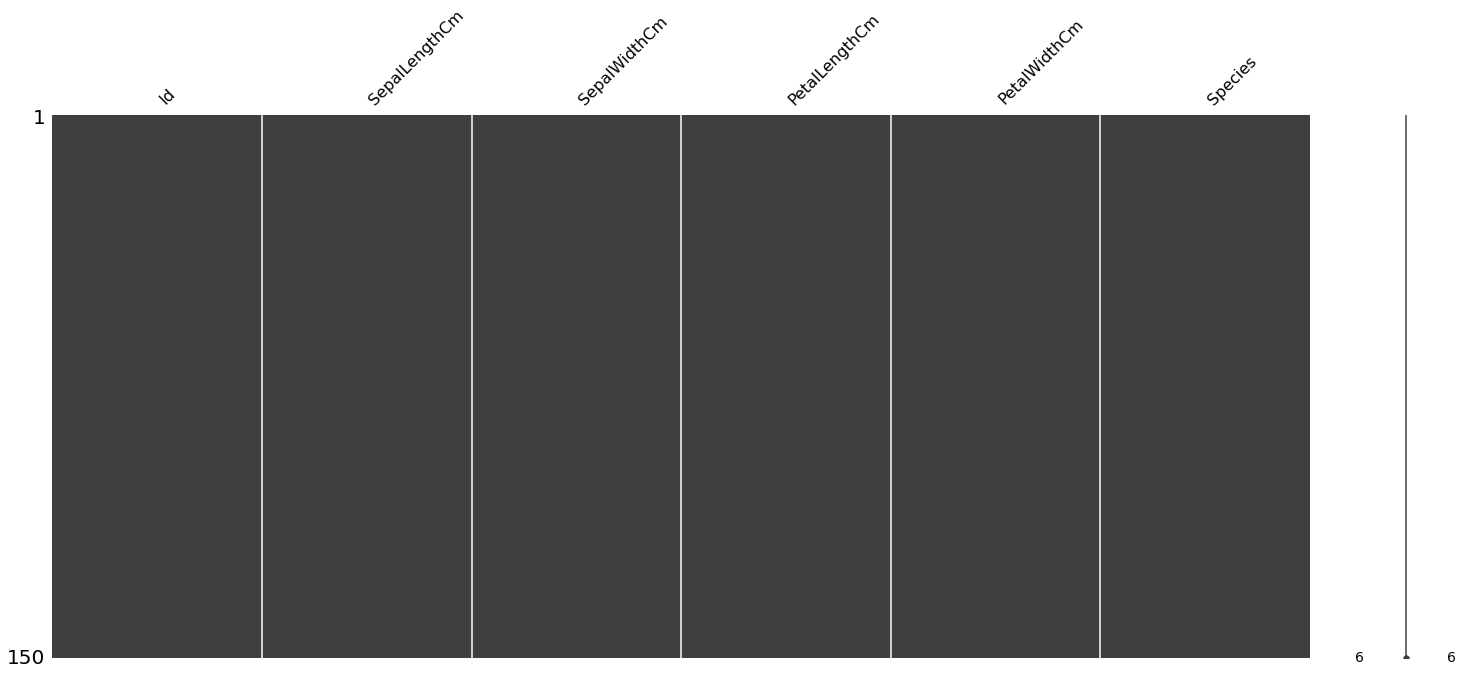

In [22]:
# vẽ biểu diễn null
import missingno as msno
msno.matrix(data);

In [28]:
(data.Species=='Iris-setosa').sum()

50

In [25]:
# Xem tỉ lê giữa các loài hoa
print('% Setosa:', format((data.Species=='Iris-setosa').sum() / len(data) * 100,'.2f'))
print('% Vesicolor:', format((data.Species=='Iris-versicolor').sum() / len(data) * 100,'.2f'))
print('% Virginica:', format((data.Species=='Iris-virginica').sum() / len(data) * 100,'.2f'))

% Setosa: 33.33
% Vesicolor: 33.33
% Virginica: 33.33


## Visualization data

In [29]:
# Copy 1 bản nháp của data để vẽ và thay đổi dữ liệu
data1 = data.copy()
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Sepal Length(cm)

In [40]:
# Đếm các giá trị duy nhất xuất hiện bao nhiêu lần
data1['SepalLengthCm'].value_counts(dropna=False)

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64

Text(0.5, 1.0, 'Boxplot for SepalLengthCm')

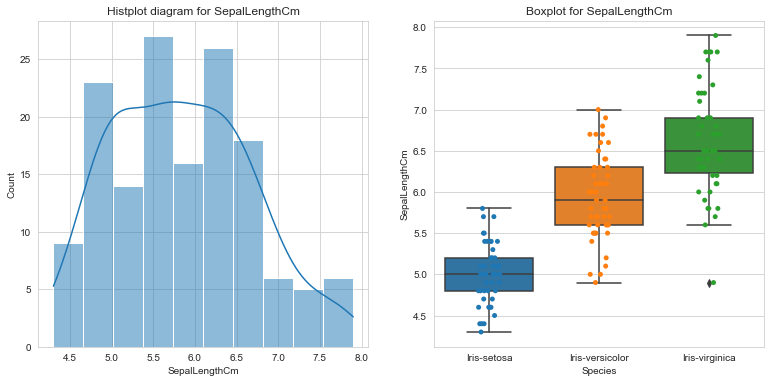

In [94]:
plt.figure(figsize=(13, 6))
plt.subplot(1,2,1) 
sns.histplot(data=data1.SepalLengthCm, bins=10, kde=True)
plt.title('Histplot diagram for SepalLengthCm')

plt.subplot(1,2,2)
sns.boxplot(x="Species", y="SepalLengthCm", data=data1)
sns.stripplot(x='Species',y='SepalLengthCm',data=data1,jitter=True,edgecolor='gray')
plt.title('Boxplot for SepalLengthCm')

### SepalWidthCm

In [56]:
data1.SepalWidthCm.value_counts(dropna=False)

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64

Text(0.5, 1.0, 'Boxplot for SepalWidthCm')

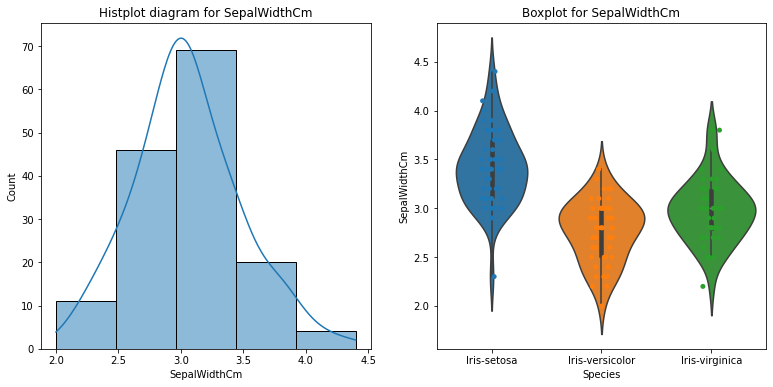

In [57]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.SepalWidthCm, bins=5, kde=True)
plt.title('Histplot diagram for SepalWidthCm')

plt.subplot(1,2,2)
sns.violinplot(x="Species", y="SepalWidthCm", data=data1, size=6)
sns.stripplot(x='Species',y='SepalWidthCm',data=data1,jitter=True,edgecolor='gray')
plt.title('Boxplot for SepalWidthCm')

### PetalLengthCm

In [58]:
data1['PetalLengthCm'].value_counts(dropna=False)

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: PetalLengthCm, dtype: int64

Text(0.5, 1.0, 'Boxplot for PetalLengthCm')

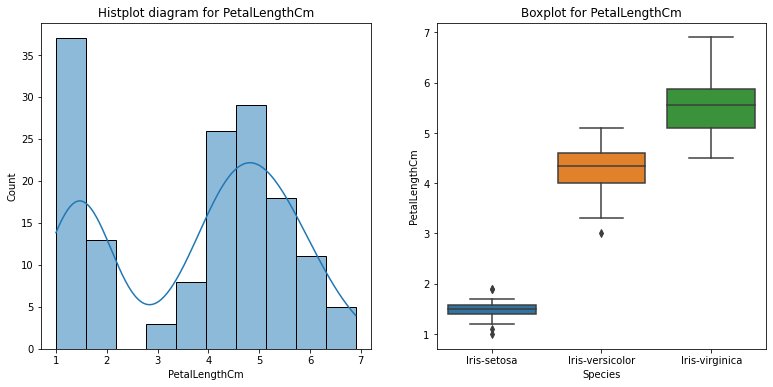

In [60]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.PetalLengthCm, bins=10, kde=True)
plt.title('Histplot diagram for PetalLengthCm')

plt.subplot(1,2,2)
sns.boxplot(x="Species", y="PetalLengthCm", data=data1)
plt.title('Boxplot for PetalLengthCm')

### PetalWidthCm

In [61]:
data1['PetalWidthCm'].value_counts(dropna=False)

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64

Text(0.5, 1.0, 'Boxplot for PetalWidthCm')

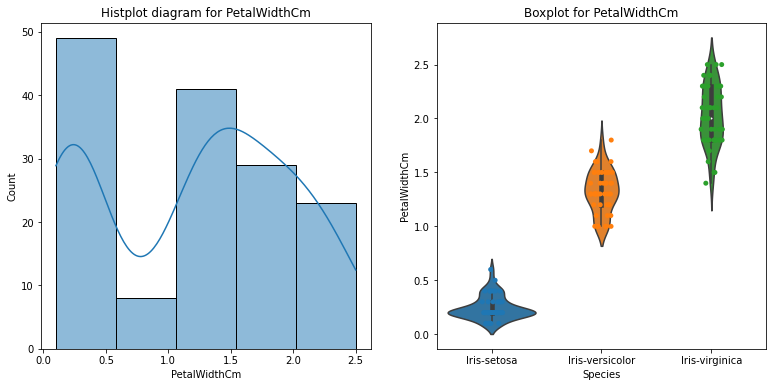

In [63]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1.PetalWidthCm, bins=5, kde=True)
plt.title('Histplot diagram for PetalWidthCm')

plt.subplot(1,2,2)
sns.violinplot(x="Species", y="PetalWidthCm", data=data1, size=6)
sns.stripplot(x='Species',y='PetalWidthCm',data=data1,jitter=True,edgecolor='gray')
plt.title('Boxplot for PetalWidthCm')

# Relationship

C:\Users\Duc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between SepalWidthCm and SepalLengthCm')

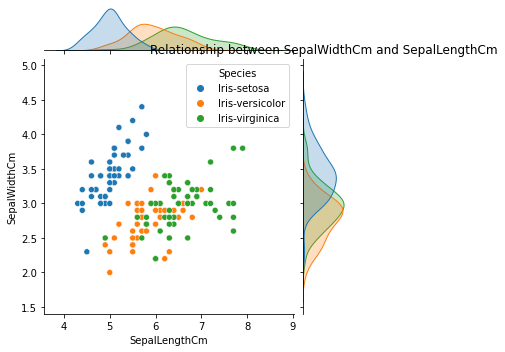

In [66]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data1, size=5, hue="Species")
plt.title('Relationship between SepalWidthCm and SepalLengthCm')

Text(0.5, 1.0, 'Regression between SepalLengthCm and SepalWidthCm')

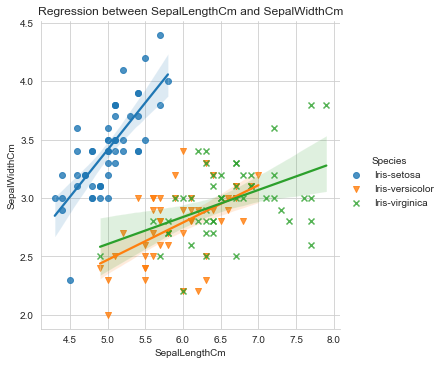

In [70]:
sns.set_style('whitegrid')
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=data1, hue="Species", markers=['o', 'v', 'x'])
plt.title('Regression between SepalLengthCm and SepalWidthCm')

C:\Users\Duc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between PetalWidthCm and PetalLengthCm')

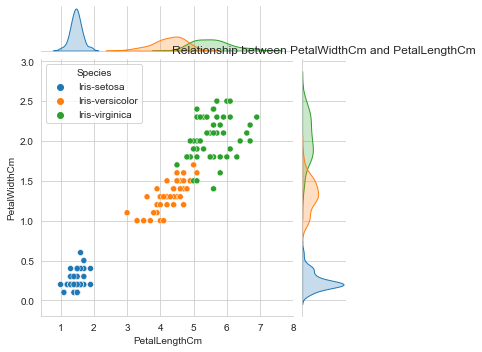

In [71]:
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=data1, size=5, hue="Species")
plt.title('Relationship between PetalWidthCm and PetalLengthCm')

Text(0.5, 1.0, 'Regression between PetalLengthCm and PetalWidthCm')

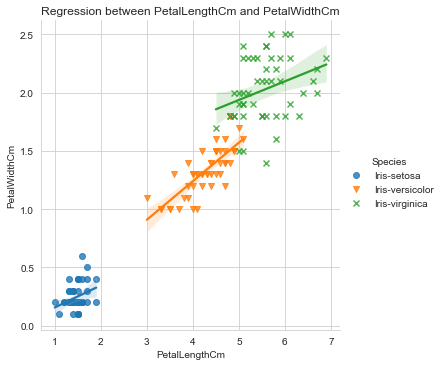

In [72]:
sns.set_style('whitegrid')
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=data1, hue="Species", markers=['o', 'v', 'x'])
plt.title('Regression between PetalLengthCm and PetalWidthCm')

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

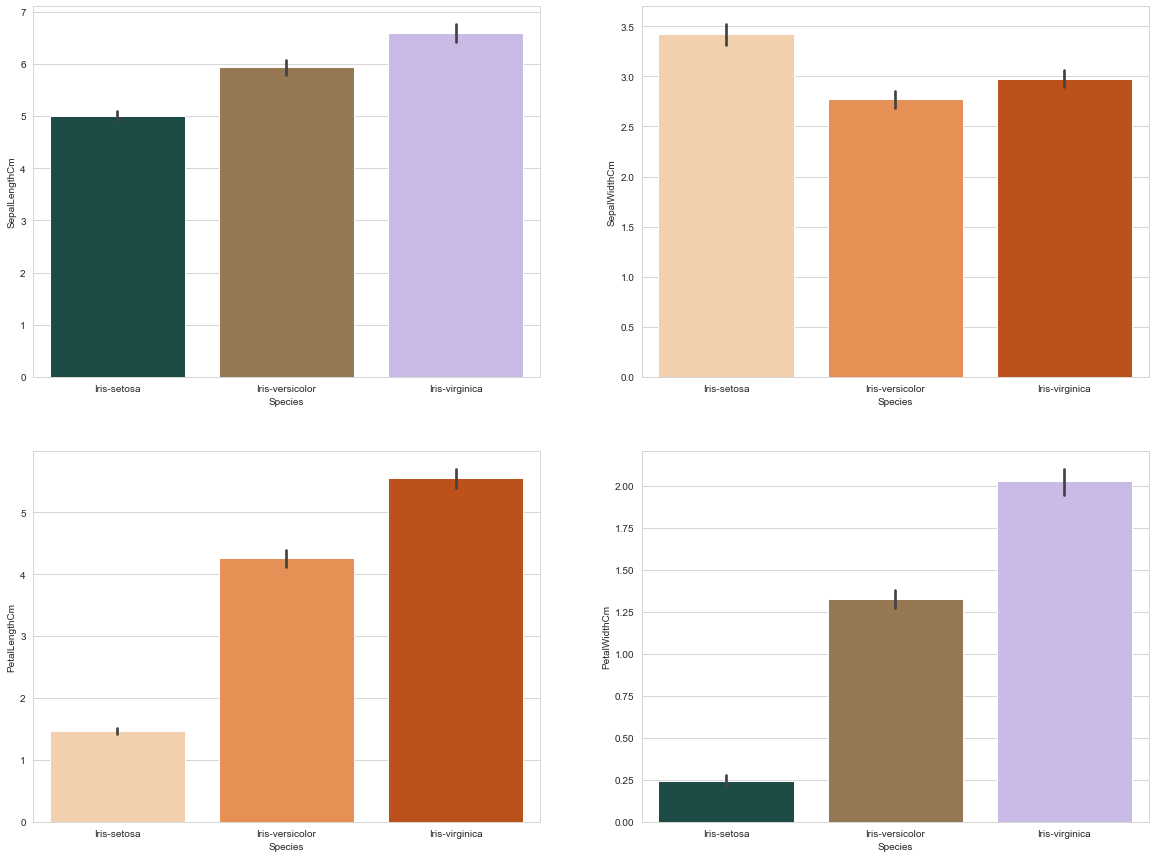

In [73]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = data1, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = data1, palette="Oranges")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = data1, palette="Oranges")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = data1, palette="cubehelix")

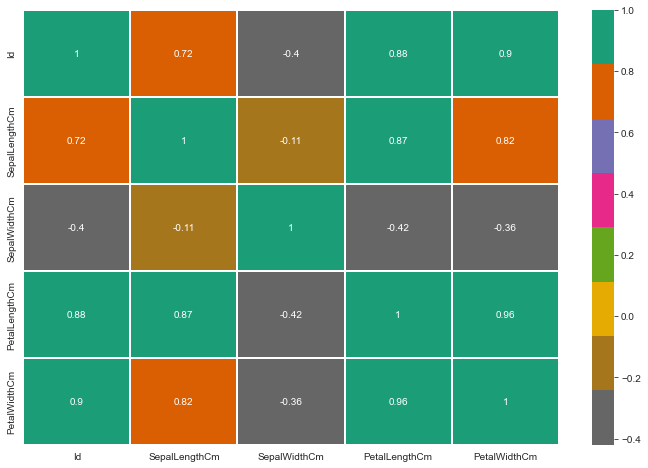

In [74]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data1.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

# Summarize

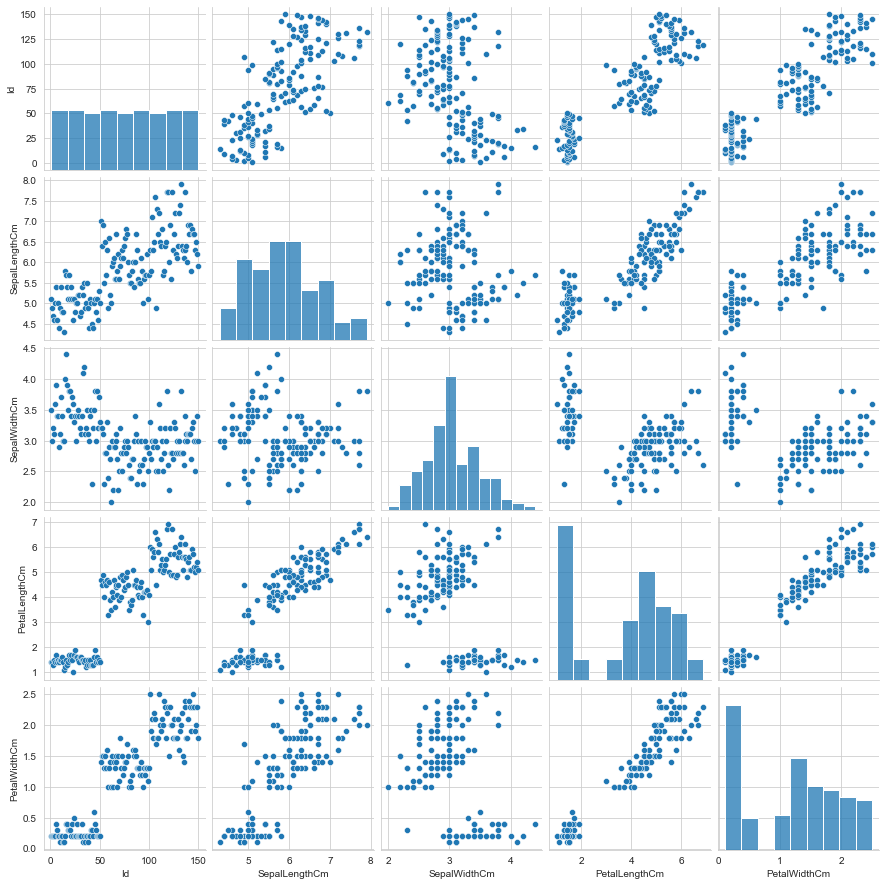

In [75]:
# biểu đồ so sánh quan hệ giữa các cặp thuộc tính
sns.pairplot(data=data1,kind='scatter')

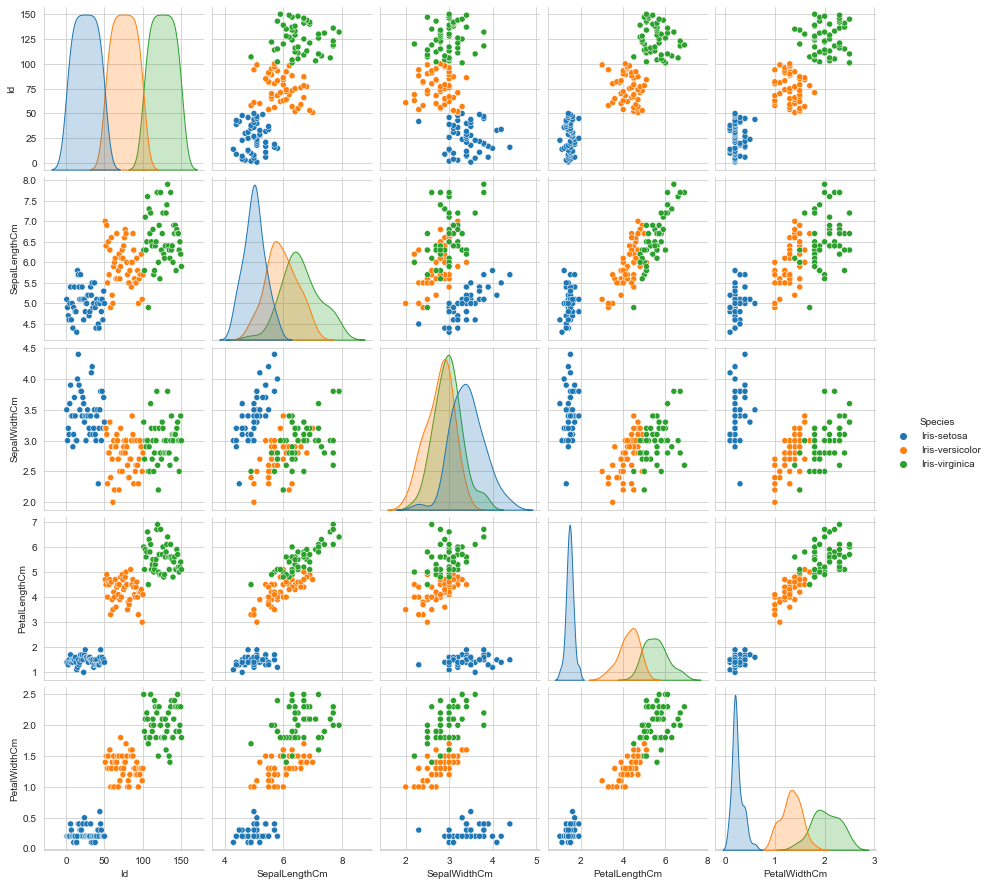

In [76]:
# biểu đồ so sánh quan hệ giữa các cặp thuộc tính phân chia theo loài hoa
sns.pairplot(data=data1,hue='Species');